In [1]:
from svg.path import parse_path
from svg.path.path import Line
from xml.dom import minidom
import numpy as np
import matplotlib.pyplot as plt

# Learned from
# https://python5.com/q/twovjmxc

In [54]:
# read the SVG file
doc = minidom.parse('B_sample.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

In [55]:
path_strings

['M108,63c0,0,35.157,0,56.25,0s42.188,29.25,56.25,58.5  s35.156,58.5,56.25,58.5s56.25,0,56.25,0']

In [56]:
path_strings[0]


'M108,63c0,0,35.157,0,56.25,0s42.188,29.25,56.25,58.5  s35.156,58.5,56.25,58.5s56.25,0,56.25,0'

In [57]:
parse_path(path_strings[0])

Path(Move(to=(108+63j)), CubicBezier(start=(108+63j), control1=(108+63j), control2=(143.15699999999998+63j), end=(164.25+63j)), CubicBezier(start=(164.25+63j), control1=(185.34300000000002+63j), control2=(206.438+92.25j), end=(220.5+121.5j)), CubicBezier(start=(220.5+121.5j), control1=(234.562+150.75j), control2=(255.656+180j), end=(276.75+180j)), CubicBezier(start=(276.75+180j), control1=(297.844+180j), control2=(333+180j), end=(333+180j)))

In [59]:
for path_string in path_strings:
    path = parse_path(path_string)
    for e in path:
        if type(e).__name__ == 'Line':
            x0 = e.start.real
            y0 = e.start.imag
            x1 = e.end.real
            y1 = e.end.imag
            print("(%.2f, %.2f) - (%.2f, %.2f)" % (x0, y0, x1, y1))

In [61]:
path=parse_path(path_strings[0])
key=0
path[key]


Move(to=(108+63j))

In [62]:
type(path[key]).__name__

'Move'

In [63]:
path[key].start.real

108.0

In [64]:
path[key].start.imag

63.0

In [65]:
key=1
path[key]

CubicBezier(start=(108+63j), control1=(108+63j), control2=(143.15699999999998+63j), end=(164.25+63j))

In [66]:
type(path[key]).__name__

'CubicBezier'

In [67]:
path[key].start.real

108.0

In [68]:
path[key].start.imag

63.0

In [72]:
def cubic_bezier_converter(start, control1, control2, end):
    original_data = np.array([start, control1, control2, end])
    cubic_bezier_matrix = np.array([
        [-1,  3, -3,  1],
        [ 3, -6,  3,  0],
        [-3,  3,  0,  0],
        [ 1,  0,  0,  0]
    ])
    return_data = cubic_bezier_matrix.dot(original_data)

    return (lambda t: np.array([t**3, t**2, t, 1]).dot(return_data))

# Learned from
# https://stackoverflow.com/questions/36971363/how-to-interpolate-svg-path-into-a-pixel-coordinates-not-simply-raster-in-pyth

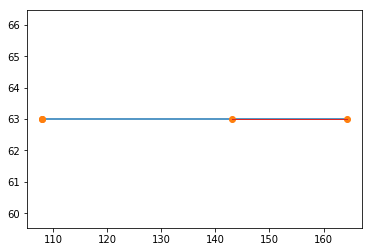

In [83]:
block=0
n_dots=100
key=0

path=parse_path(path_strings[block])

dat=path[key]numpy.linalg.norm(u)
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()

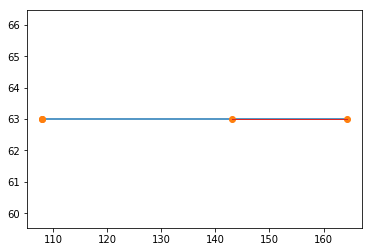

In [84]:
block=0
n_dots=100
key=1

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()

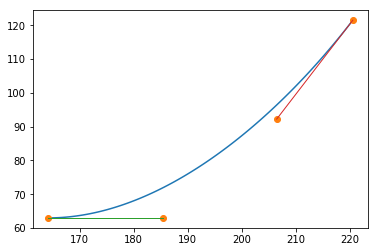

In [85]:
block=0
n_dots=100
key=2

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()

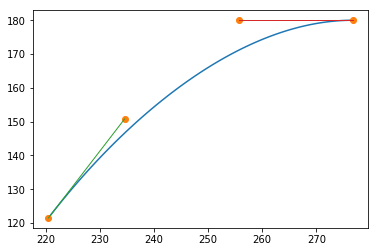

In [86]:
block=0
n_dots=100
key=3

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()

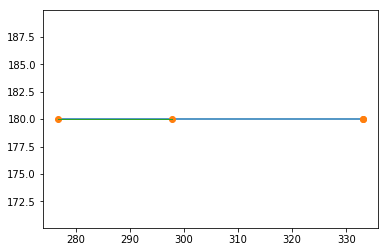

In [87]:
block=0
n_dots=100
key=4

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()

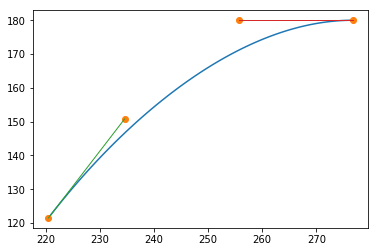

In [98]:
diff_np=start_np-end_np
n_dots=np.round(np.linalg.norm(diff_np))

block=0
n_dots=100
key=3

path=parse_path(path_strings[block])

dat=path[key]
if type(path[key]).__name__=='CubicBezier':
    start_np = np.array([dat.start.real, dat.start.imag])
    control1_np = np.array([dat.control1.real, dat.control1.imag])
    control2_np = np.array([dat.control2.real, dat.control2.imag])
    end_np = np.array([dat.end.real, dat.end.imag])
    converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
    points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
    
# == plot the line==
controls_np = np.array([start_np, control1_np, control2_np, end_np])
#  curve drawing 
plt.plot(points_np[:, 0], points_np[:, 1], '-')
# showing of control points
plt.plot(controls_np[:,0], controls_np[:,1], 'o')
#  control line drawing 
plt.plot([start_np[0], control1_np[0]], [start_np[1], control1_np[1]], '-', lw=1)
plt.plot([control2_np[0], end_np[0]], [control2_np[1], end_np[1]], '-', lw=1)

plt.show()